In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['savefig.facecolor']='#FFFFFF'

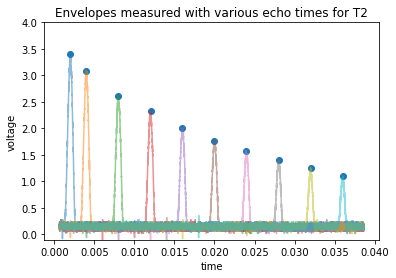

In [46]:
# fitting T2
datafiles = []
root = "data/nmr_data_dec_01/T2"
for datafile in os.listdir(root):
    datafiles.append(os.path.join(root, datafile))

flip_times = []
peak_voltages = []
for i, measurement in enumerate(sorted(datafiles)):

    df = pd.read_csv(measurement, sep="\s+")
    times = np.array(df['Time'])
    envelopes = np.array(df['Ch1'])
    
    
    cutoff = 500
    flip_times.append(times[np.argmax(envelopes[cutoff:])+cutoff])
    peak_voltages.append(np.max(envelopes[cutoff:]))

    plt.plot(times[cutoff:], envelopes[cutoff:], alpha=0.5)

    plt.ylim(-0.1,4)
plt.scatter(flip_times, peak_voltages)
plt.title("Envelopes measured with various echo times for T2")
plt.xlabel("time")
plt.ylabel("voltage")
plt.savefig("figures/t2_data_again.png")

plt.show()

tau = 30.912813362376053 ms
A =  31.881324464061116


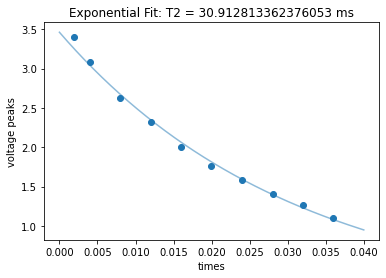

In [47]:
b, a = np.polyfit(flip_times, np.log(peak_voltages), 1)

tau = -1/b
A = np.exp(a)
print(f'tau = {tau*1000} ms')
print('A = ', np.exp(A))

x = np.linspace(0,0.04,1000)
y = A*np.exp(-x/tau)
plt.scatter(flip_times, peak_voltages)
plt.plot(x,y,alpha = 0.5)

plt.title(f'Exponential Fit: T2 = {tau*1000} ms')
plt.xlabel('times')
plt.ylabel('voltage peaks')
plt.savefig('figures/t2_analysis_again.png')

plt.show()